In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
start = '2015-01-01'
end = '2017-01-01'

united = get_pricing('UAL',start_date=start,end_date=end)
american = get_pricing('AAL',start_date=start,end_date=end)

In [3]:
united.head()

,open_price,high,low,close_price,volume,price
2015-01-02 00:00:00+00:00,67.740,68.08,65.71,66.380,5678309.0,66.380
2015-01-05 00:00:00+00:00,66.870,67.35,65.50,66.140,4263592.0,66.140
2015-01-06 00:00:00+00:00,66.630,67.00,63.11,64.599,5422328.0,64.599
2015-01-07 00:00:00+00:00,64.959,66.11,64.00,65.530,4230901.0,65.530
2015-01-08 00:00:00+00:00,65.700,67.52,65.41,66.540,5515839.0,66.540


In [4]:
american.head()

,open_price,high,low,close_price,volume,price
2015-01-02 00:00:00+00:00,53.222,53.536,52.036,52.859,9507330.0,52.859
2015-01-05 00:00:00+00:00,53.310,53.477,52.301,52.830,10401276.0,52.830
2015-01-06 00:00:00+00:00,53.212,53.369,51.114,52.006,12491282.0,52.006
2015-01-07 00:00:00+00:00,52.340,52.605,51.104,51.967,9316925.0,51.967
2015-01-08 00:00:00+00:00,52.438,53.222,52.212,52.614,8802391.0,52.614


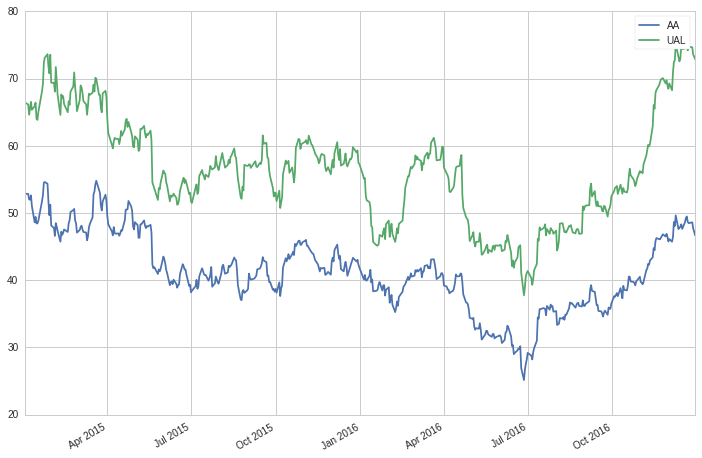

In [5]:
american['close_price'].plot(label='AA',figsize=(12,8))
united['close_price'].plot(label='UAL')
plt.legend()

##### If we were really doing some pairs trading we would look at co-integration instead of the standard correlation.

In [6]:
np.corrcoef(american['close_price'],united['close_price'])

array([[ 1.        ,  0.92333958],
       [ 0.92333958,  1.        ]])

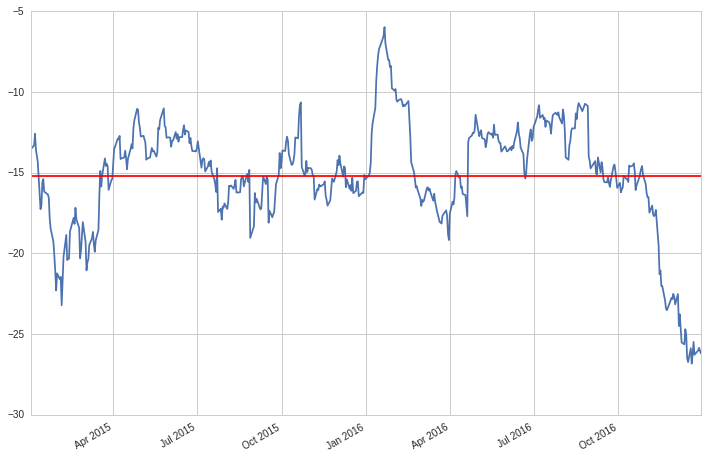

In [7]:
spread = american['close_price'] - united['close_price']
spread.plot(label='spread',figsize=(12,8))
plt.axhline(spread.mean(),c='r')

The difference between these two companies, the red line indicates the average spread.

In [8]:
# Take a time series of stocks and normalize
def zscore(stocks):
    return (stocks-stocks.mean()) / np.std(stocks)

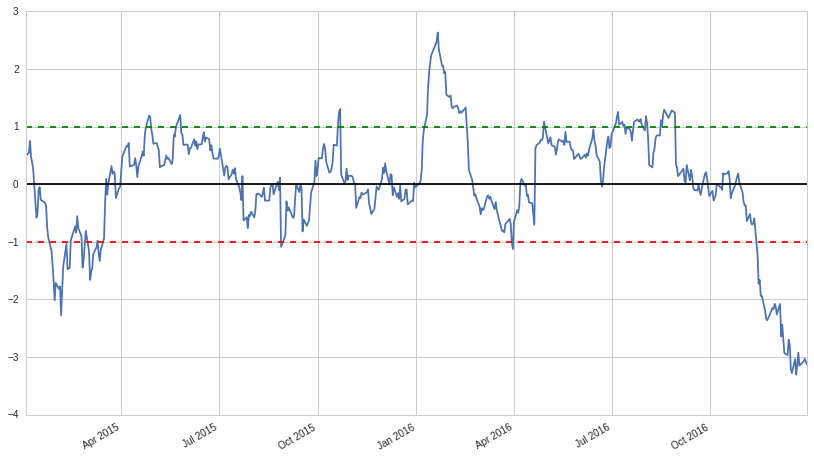

In [10]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(),color='black')
plt.axhline(1.0,c='g',ls='--')
plt.axhline(-1.0,c='r',ls='--')

Shape is the same, however the values are normalized. Thus, if we set upper and lower limits on this value those can serve as our entry and exit points.

Simple mean reversion strategy...

In reality we are going to need a rolling z score!

In [11]:
spread_mavg1 = spread.rolling(1).mean()

spread_mavg30 = spread.rolling(30).mean()

std_30 = spread.rolling(30).std()

zscore_30_1 = (spread_mavg1-spread_mavg30)/std_30

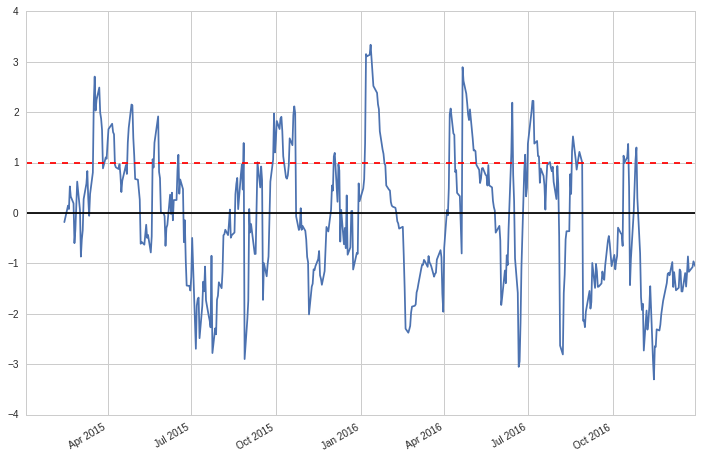

In [12]:
zscore_30_1.plot(figsize=(12,8),label='Rolling 30 Day Z Score')
plt.axhline(0,color='black')
plt.axhline(1.0,color='red',ls='--')

Now we having a rolling z score we can used to determine order execution.